# Explore here

In [27]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.shape

(768, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [33]:
df.Glucose.value_counts()

Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64

In [34]:
df.BloodPressure.value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

In [35]:
df.SkinThickness.value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40     16
22     16
37     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
16      6
11      6
45      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
8       2
52      2
7       2
60      1
51      1
56      1
63      1
99      1
Name: count, dtype: int64

In [36]:
df.Insulin.value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [37]:
df.BMI.value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64

In [38]:
df.DiabetesPedigreeFunction.value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
0.427    1
1.213    1
0.329    1
1.318    1
0.933    1
Name: count, Length: 517, dtype: int64

In [39]:
df.Age.value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [40]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

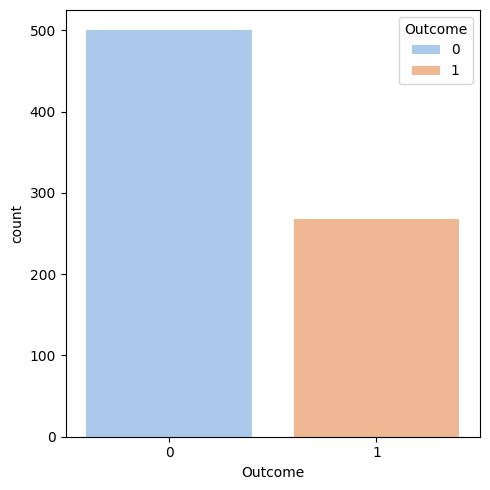

In [41]:
fig, axis = plt.subplots(figsize=(5, 5))
sns.countplot(data=df, x="Outcome", palette='pastel', hue="Outcome")
plt.tight_layout()
plt.show()

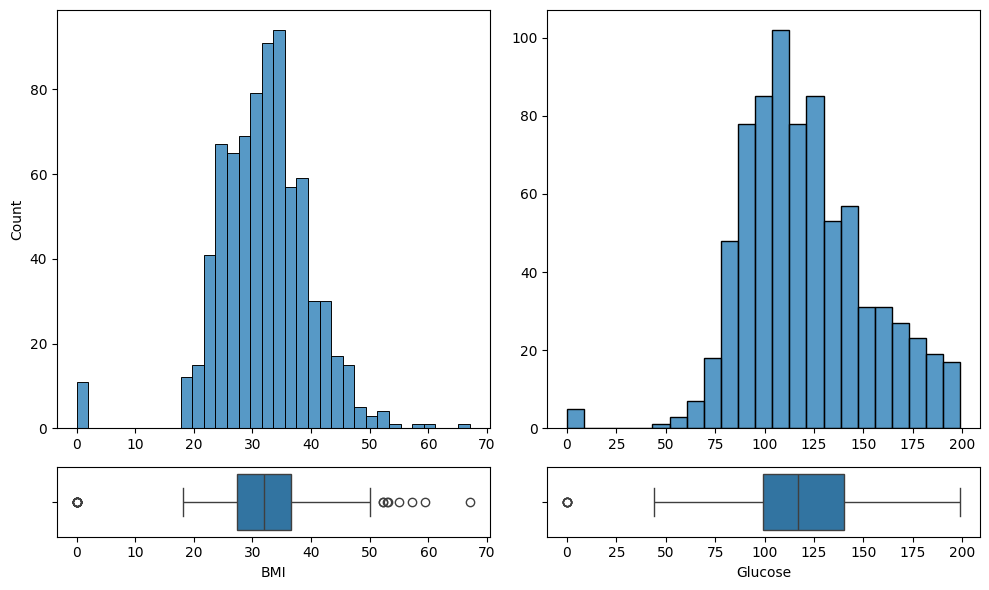

In [42]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax=axis[0, 0], data=df, x="BMI").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="BMI")
sns.histplot(ax=axis[0, 1], data=df, x="Glucose").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="Glucose")
plt.tight_layout()
plt.show()

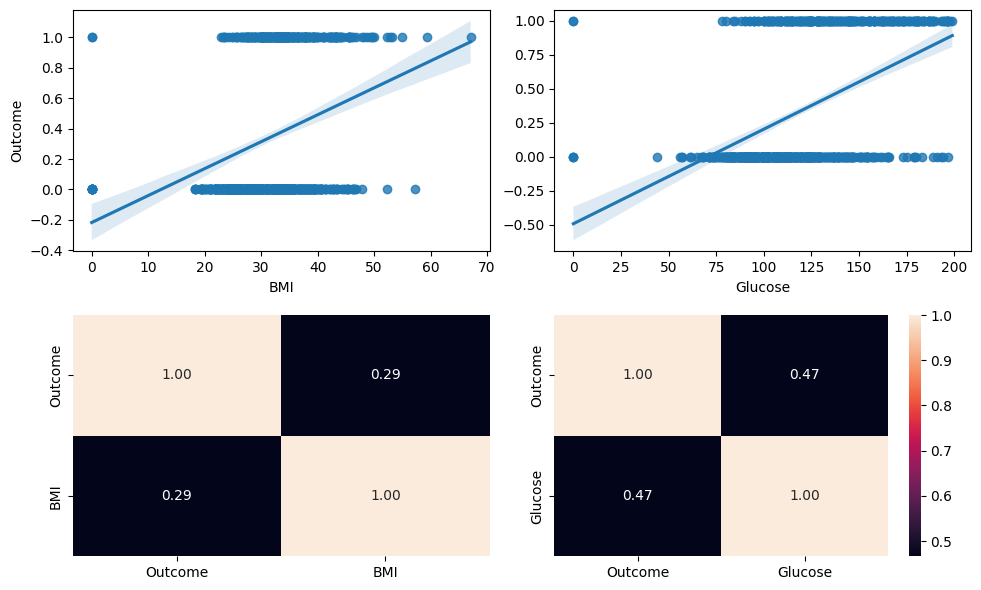

In [43]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.regplot(ax=axis[0, 0], data=df, x="BMI", y="Outcome")
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x="Glucose", y="Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
plt.tight_layout()
plt.show()

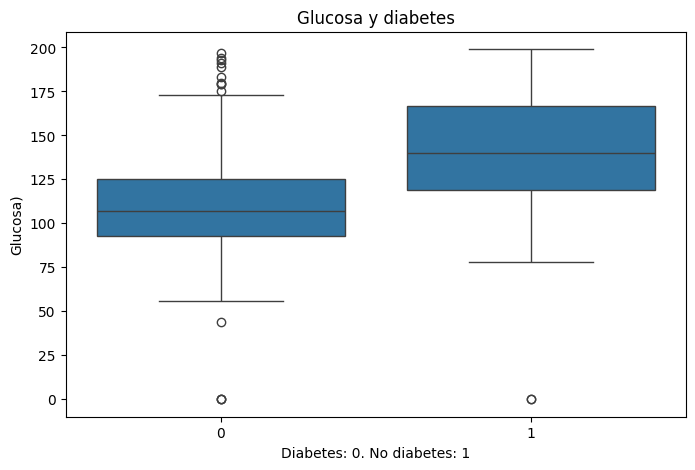

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucosa y diabetes')
plt.xlabel('Diabetes: 0. No diabetes: 1')
plt.ylabel('Glucosa)')
plt.show()

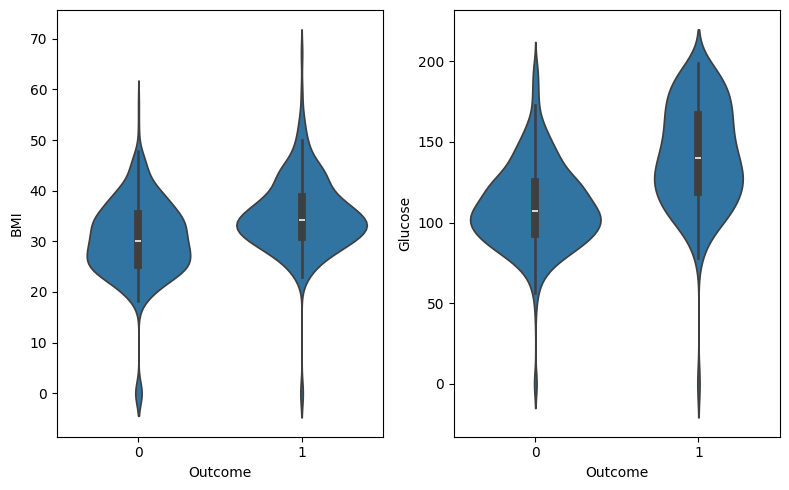

In [45]:
fig, axis = plt.subplots(1, 2, figsize=(8, 5))
sns.violinplot(ax=axis[0], x='Outcome', y='BMI', data=df)
sns.violinplot(ax=axis[1], x='Outcome', y='Glucose', data=df)
plt.tight_layout()
plt.show()

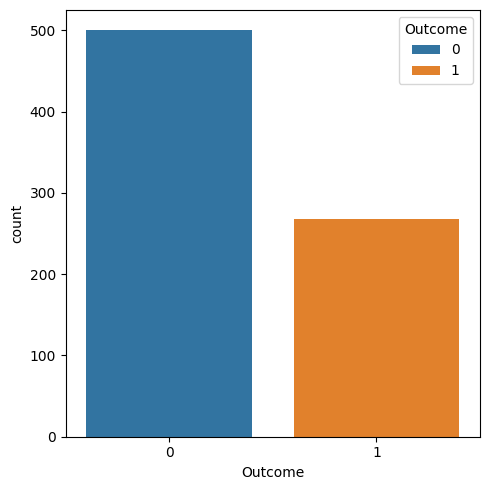

In [46]:
fig, axis = plt.subplots(figsize=(5, 5))
sns.countplot(data=df, x="Outcome", hue="Outcome")
plt.tight_layout()
plt.show()

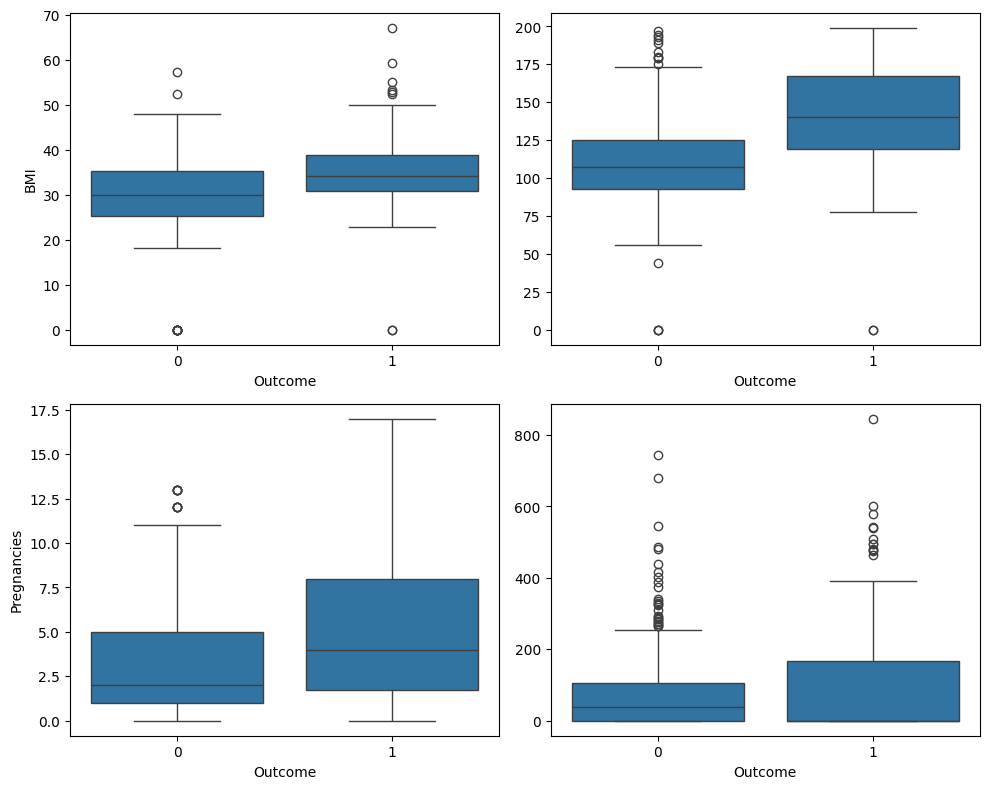

In [47]:
fig, axis = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(ax=axis[0, 0], data=df, x="Outcome", y="BMI")
sns.boxplot(ax=axis[0, 1], data=df, x="Outcome", y="Glucose").set(ylabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="Outcome", y="Pregnancies")
sns.boxplot(ax=axis[1, 1], data=df, x="Outcome", y="Insulin").set(ylabel=None)
plt.tight_layout()
plt.show()

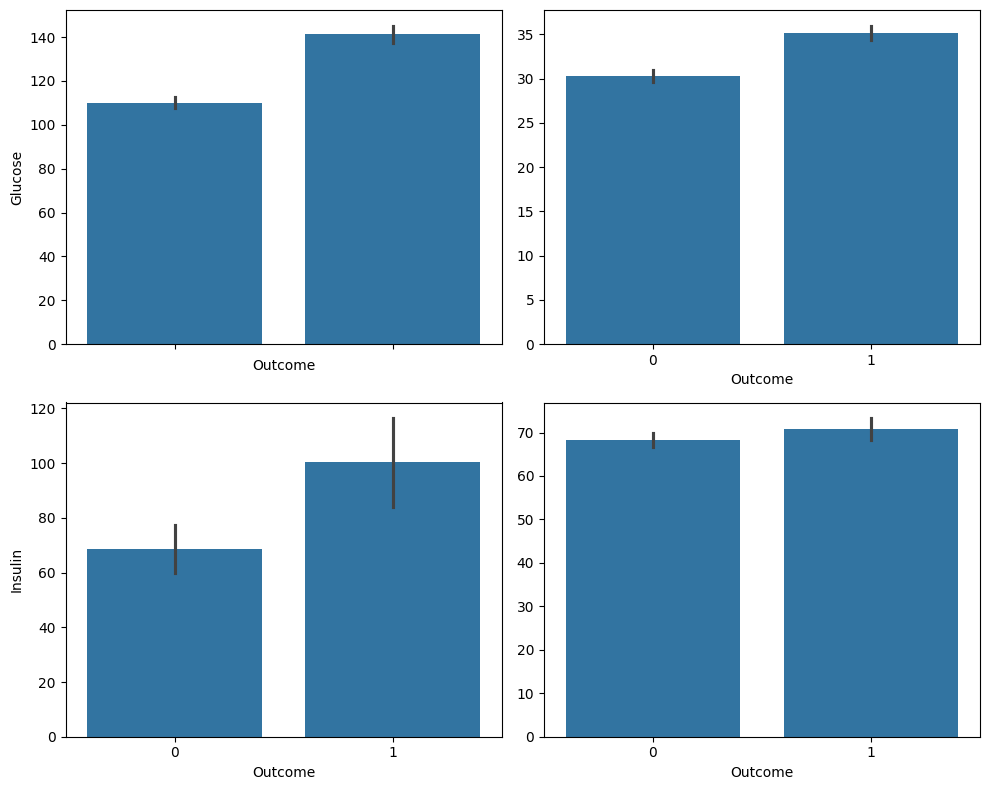

In [48]:
fig, axis = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(ax=axis[0, 0], data=df, x="Outcome", y="Glucose").set_xticklabels([])
sns.barplot(ax=axis[0, 1], data=df, x="Outcome", y="BMI").set(ylabel=None)
sns.barplot(ax=axis[1, 0], data=df, x="Outcome", y="Insulin")
sns.barplot(ax=axis[1, 1], data=df, x="Outcome", y="BloodPressure").set(ylabel=None)
plt.tight_layout()
plt.show()

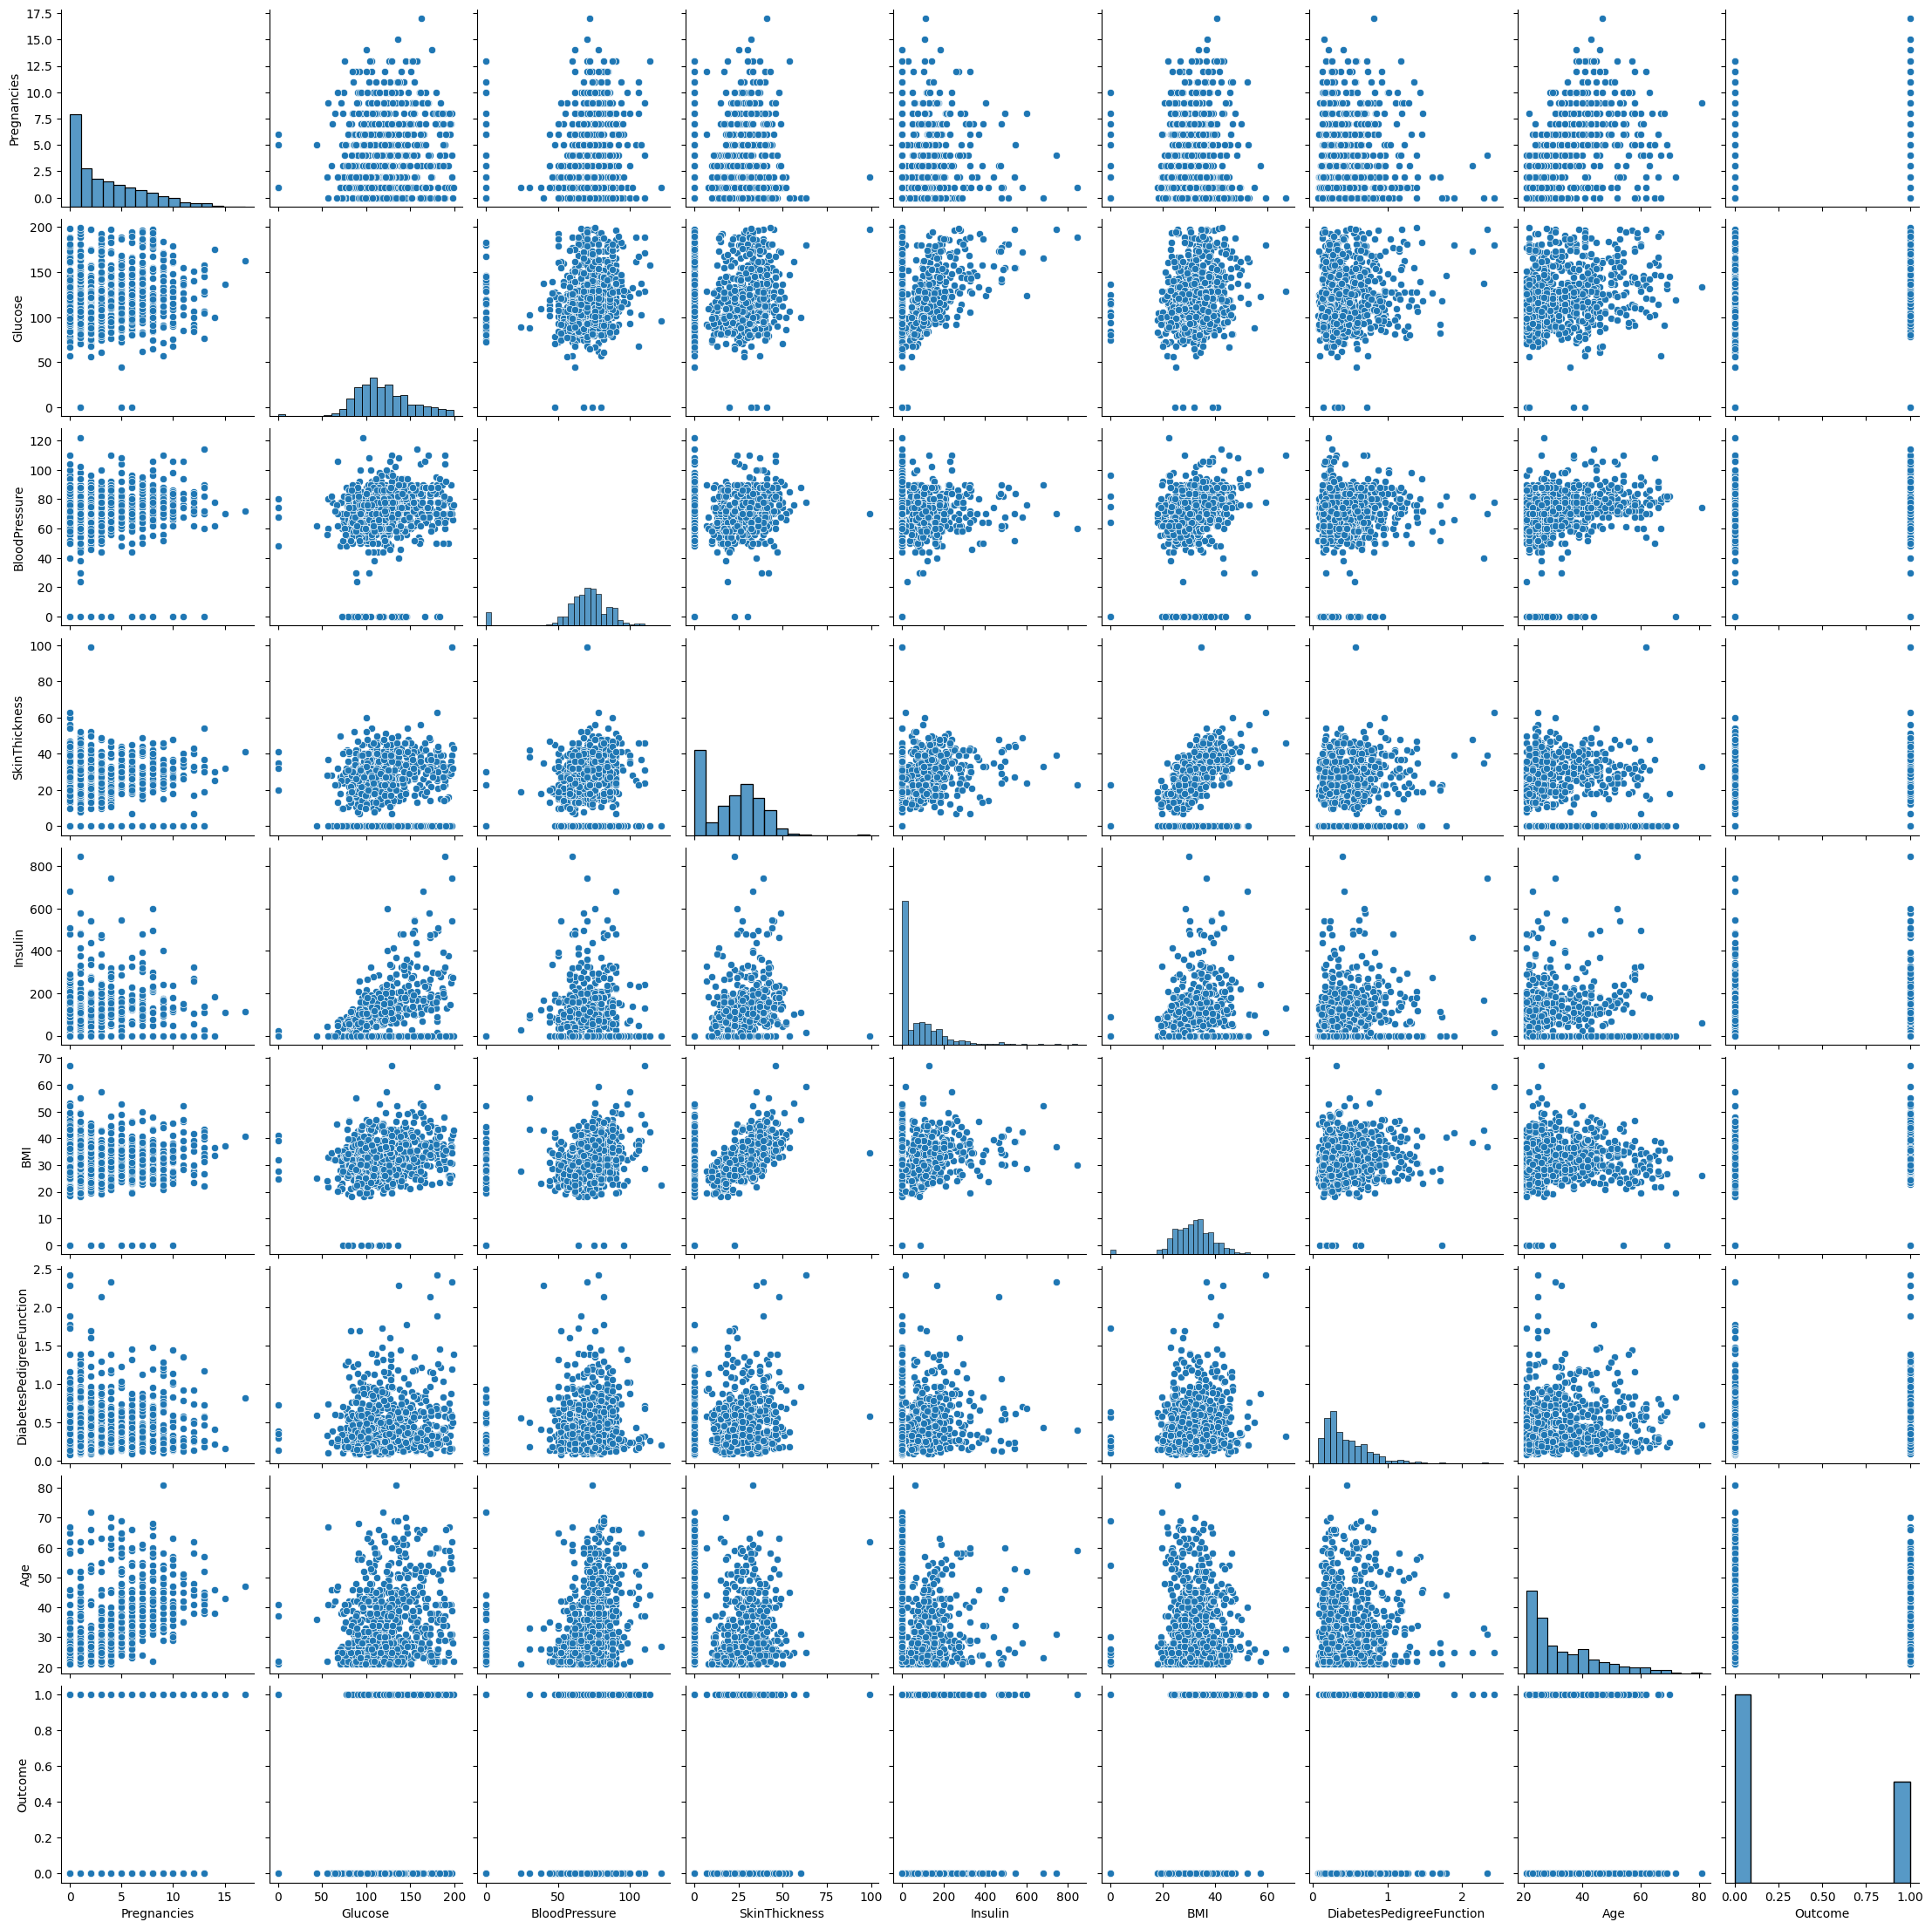

In [49]:
sns.pairplot(data = df)

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:

# Análisis de outliers para Insulin
insulin_est = df["Insulin"].describe()
print(insulin_est)

iqr = insulin_est["75%"] - insulin_est["25%"]
upper_limit = insulin_est["75%"] + 1.5 * iqr
lower_limit = insulin_est["25%"] - 1.5 * iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

df = df[df["Insulin"] > 0]
df = df[df["Insulin"] < 150]
insulin_val2 = df[df["Insulin"] > 151].shape[0]
print("Valores mayores o iguales a 151: ", insulin_val2)
#Podemos ver que la media es 81 y el 75% por lo que podemos eliminar valores mayores a 150 que están muy alejados de la media


count    239.000000
mean      87.317992
std       33.889578
min       14.000000
25%       59.500000
50%       88.000000
75%      115.000000
max      148.000000
Name: Insulin, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 198.25 y -23.75, con un rango intercuartílico de 55.5
Valores mayores o iguales a 151:  0


In [91]:

# Análisis de outliers para Age
age_est = df["Age"].describe()
print(age_est)

iqr = age_est["75%"] - age_est["25%"]
upper_limit = age_est["75%"] + 1.5 * iqr
lower_limit = age_est["25%"] - 1.5 * iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

#La media está en 33 pero 81 por lo que tampoco nos hace falta eliminar valores es un intervalor bastante adecuado.

count    239.000000
mean      29.054393
std        8.905737
min       21.000000
25%       23.000000
50%       26.000000
75%       33.000000
max       81.000000
Name: Age, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 48.0 y 8.0, con un rango intercuartílico de 10.0


In [92]:
#Empezamos con el entrenamiento y modelo
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split


X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)


In [93]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,7.0,81.0,78.0,40.0,48.0,46.7,42.0
1,1.0,97.0,66.0,15.0,140.0,23.2,22.0
2,10.0,161.0,68.0,23.0,132.0,25.5,47.0
3,1.0,139.0,46.0,19.0,83.0,28.7,22.0
4,2.0,87.0,58.0,16.0,52.0,32.7,25.0


In [94]:
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,4.0,117.0,64.0,27.0,120.0,33.2,24.0
1,1.0,128.0,98.0,41.0,58.0,32.0,33.0
2,11.0,136.0,84.0,35.0,130.0,28.3,42.0
3,2.0,84.0,50.0,23.0,76.0,30.4,21.0
4,1.0,167.0,74.0,17.0,144.0,23.4,33.0


In [95]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [96]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,4.0,117.0,64.0,27.0,120.0,33.2,24.0,0
1,1.0,128.0,98.0,41.0,58.0,32.0,33.0,1
2,11.0,136.0,84.0,35.0,130.0,28.3,42.0,1
3,2.0,84.0,50.0,23.0,76.0,30.4,21.0,0
4,1.0,167.0,74.0,17.0,144.0,23.4,33.0,1


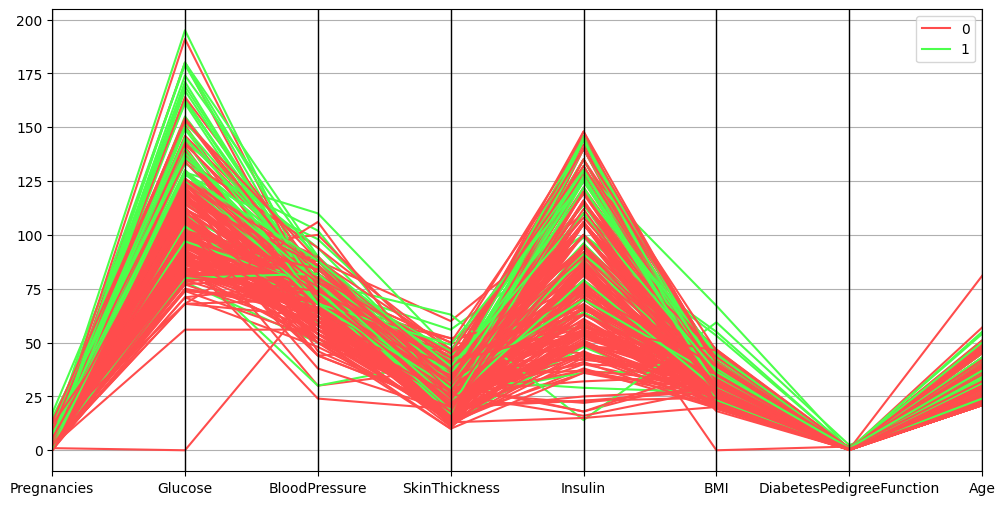

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color=("#FF4C4C", "#4CFF4C", "#4C4CFF"))
#Si le quito valores tan altos a insulina queda todo más a la par habría que verlo bien
plt.show()

In [98]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

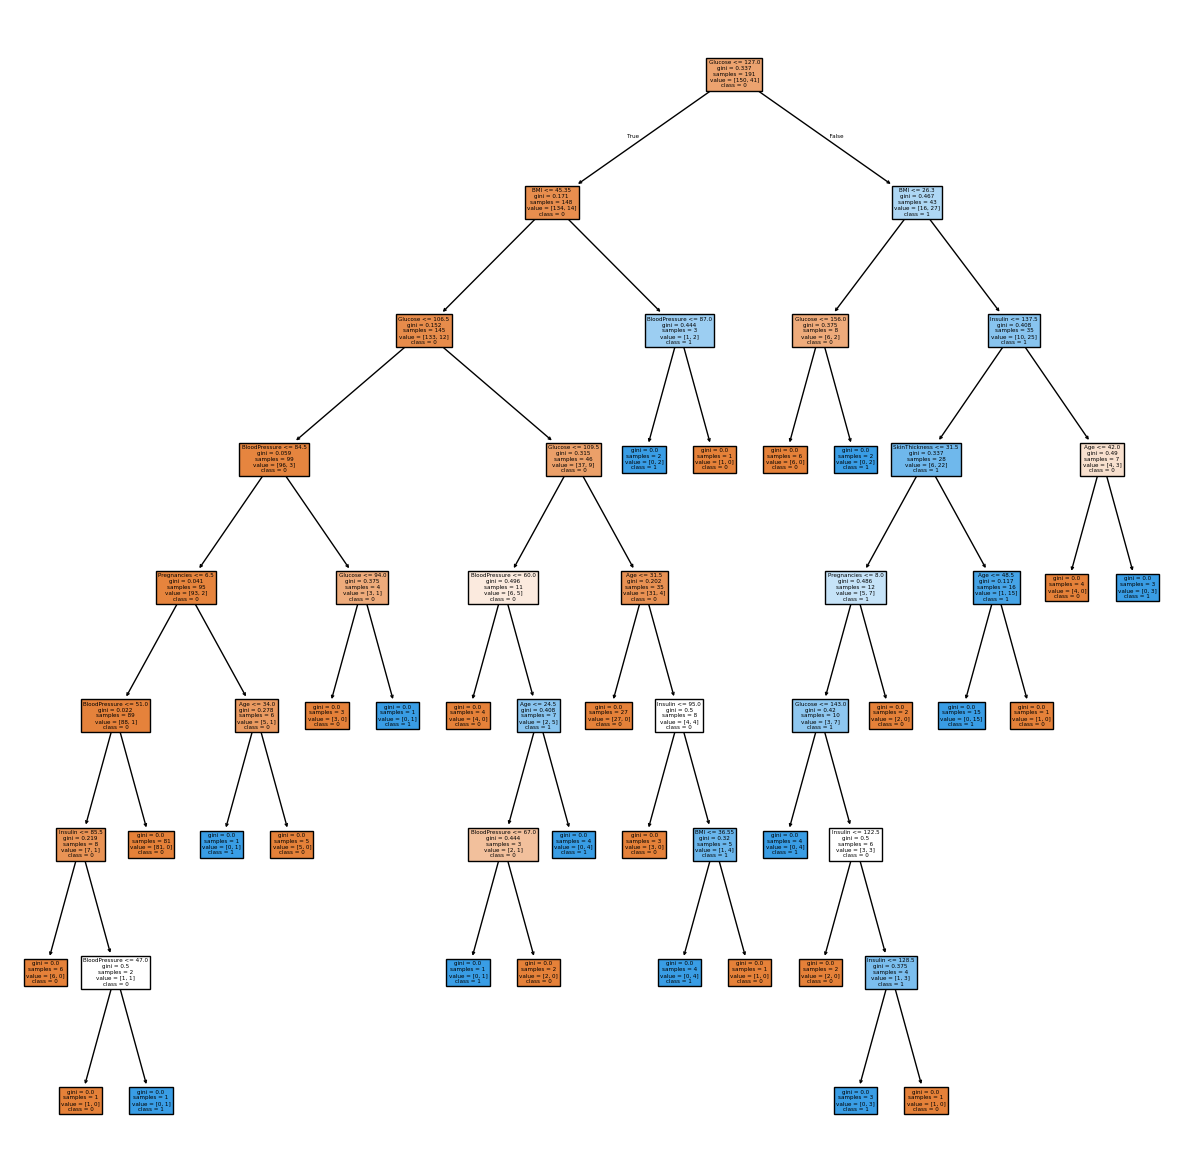

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [100]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [101]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7083333333333334

In [102]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [103]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [104]:
#Guardo los parametros en una variable para luego usarla
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [105]:
#Pongo los parametros
y_pred = best_model.predict(X_test)

In [106]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print("Precisión (Accuracy):", accuracy_score(y_test, y_pred))
#Se puede ver que no mejora ya que elegí el parametro f1 ahora voy a probar eligiendo accuracy

Error cuadrático medio: 0.125
Precisión (Accuracy): 0.875


In [107]:
#Otros parametros
grid_search = GridSearchCV(model, param_grid, scoring = "accuracy", cv = 10)
grid_search

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [108]:
grid_search.fit(X_train, y_train)

print(f"Mejores: {grid_search.best_params_}")

Mejores: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [109]:
best_model = grid_search.best_estimator_

In [110]:
y_pred = best_model.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
accuracy_score(y_test, y_pred)
#Aqui si podemos ver que mejora el resultado y por último vamos a probar con otros parametros

Error cuadrático medio: 0.1875


0.8125

In [112]:
hiper = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search = GridSearchCV(model, hiper, scoring = "accuracy", cv = 10)
grid_search

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [113]:
grid_search.fit(X_train, y_train)

print(f"Mejores: {grid_search.best_params_}")

Mejores: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [114]:
best_model = grid_search.best_estimator_

In [115]:
y_pred = best_model.predict(X_test)

In [116]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
accuracy_score(y_test, y_pred)

#En cambio con estos parametros no mejora el resultado, por lo que me quedo con los anteriores.

Error cuadrático medio: 0.1875


0.8125

In [117]:
from pickle import dump
dump(model, open("../models/decision_tree_regressor_default_42.sav", "wb"))

In [118]:
import pandas as pd

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,4.0,117.0,64.0,27.0,120.0,33.2,24.0,0
1,1.0,128.0,98.0,41.0,58.0,32.0,33.0,1
2,11.0,136.0,84.0,35.0,130.0,28.3,42.0,1
3,2.0,84.0,50.0,23.0,76.0,30.4,21.0,0
4,1.0,167.0,74.0,17.0,144.0,23.4,33.0,1


In [119]:
#Aqui si no lo hubieramos hecho ya deberiamos eliminar outcome de x_train y ponerlo en y_train pero ya lo hemos hecho anteriormente en el dataset
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,4.0,117.0,64.0,27.0,120.0,33.2,24.0,0
1,1.0,128.0,98.0,41.0,58.0,32.0,33.0,1
2,11.0,136.0,84.0,35.0,130.0,28.3,42.0,1
3,2.0,84.0,50.0,23.0,76.0,30.4,21.0,0
4,1.0,167.0,74.0,17.0,144.0,23.4,33.0,1


In [120]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 60)
model.fit(X_train, y_train)
#He probado diferentes alores
#random_state = 42)
#n_estimators = 50, 100, 200, 30 y el mejor resultado es el siguiente

RandomForestClassifier(n_estimators=60)

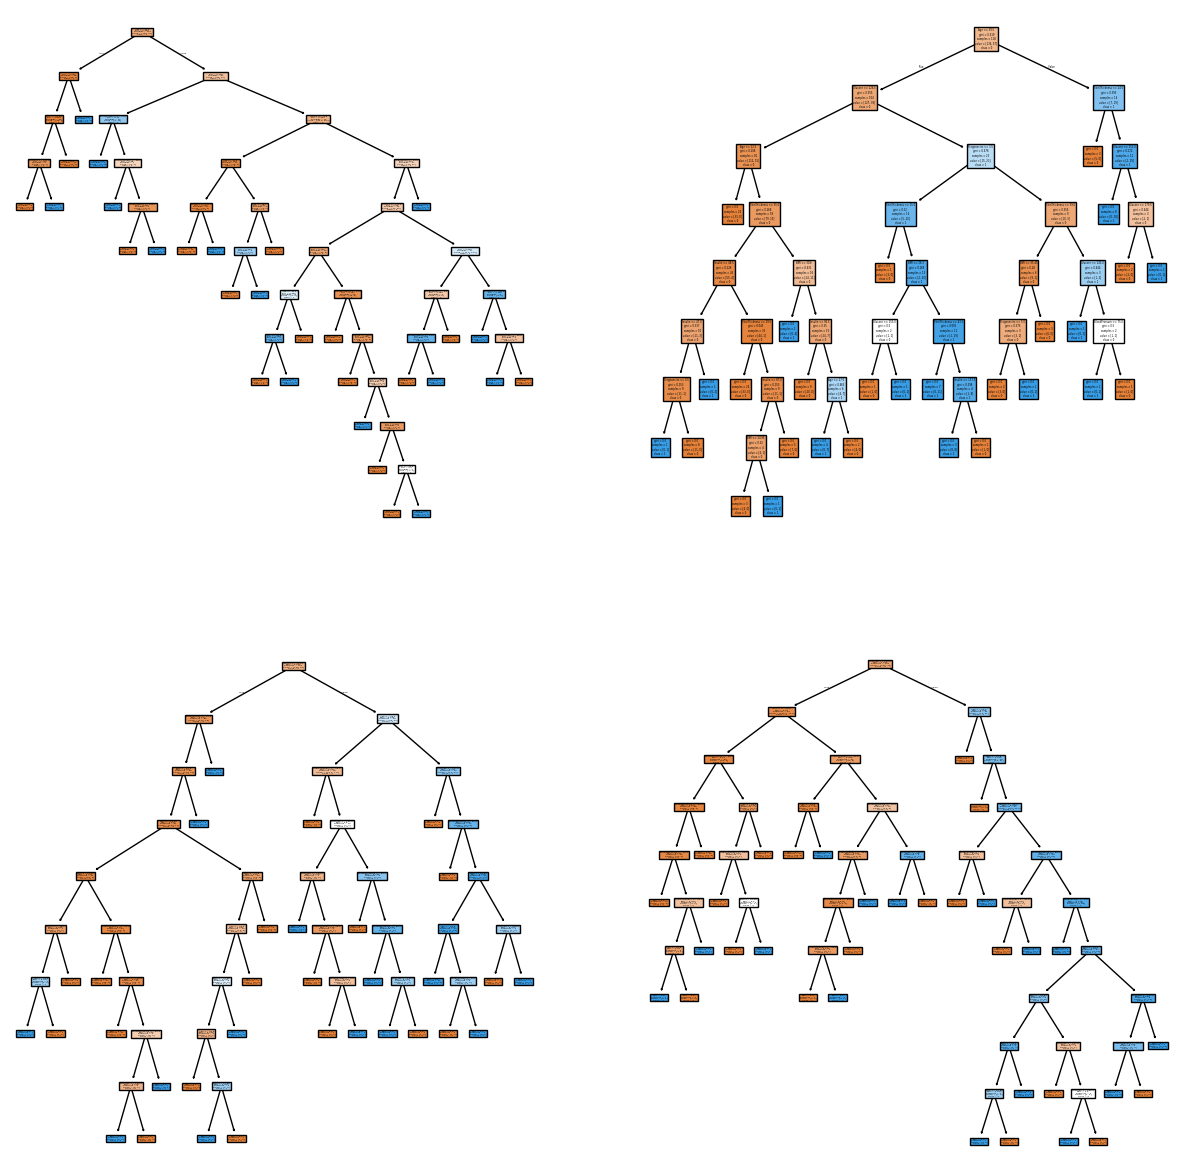

In [121]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))
#Enseñamos el arbol después de ser entrenado
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [122]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [123]:
from sklearn.metrics import accuracy_score

print(f"Error medio cuadrático: {mean_squared_error(y_test, y_pred)}")
accuracy_score(y_test, y_pred)
#Se puede ver como claramente ha mejorado el modelo ha pasado de 0,7 a 0,76 de precisión.

Error medio cuadrático: 0.16666666666666666


0.8333333333333334

In [124]:
from pickle import dump

dump(model, open("../models/ranfor_classifier_nestimators-60_42.sav", "wb"))

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# Suponiendo que df ya está cargado con las columnas del dataset de diabetes
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir el modelo base
model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [50, 100, 150, 200, 300], 
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1-score (validación cruzada):", grid_search.best_score_)

# Predecir con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
print("\n--- Modelo Optimizado ---")
print("Precisión (Accuracy) en prueba:", accuracy_score(y_test, y_pred))
print("F1-Score en prueba:", f1_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Mejores hiperparámetros: {'n_estimators': 300}
Mejor F1-score (validación cruzada): 0.8016194331983805

--- Modelo Optimizado ---
Precisión (Accuracy) en prueba: 0.8125
F1-Score en prueba: 0.47058823529411764

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.57      0.40      0.47        10

    accuracy                           0.81        48
   macro avg       0.71      0.66      0.68        48
weighted avg       0.79      0.81      0.80        48


Matriz de confusión:
 [[35  3]
 [ 6  4]]
